In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch.nn as nn
import torch
import matplotlib.pyplot as plt

In [2]:
path='/kaggle/input/digit-recognizer/train.csv'
trainset=pd.read_csv(path)
trainset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from torch.utils.data import DataLoader

In [4]:
trainset.drop('label',axis=1)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


__*sample data*__

In [5]:
sample=np.array(trainset.drop('label',axis=1).iloc[6])
sample=sample.reshape((28,-1))

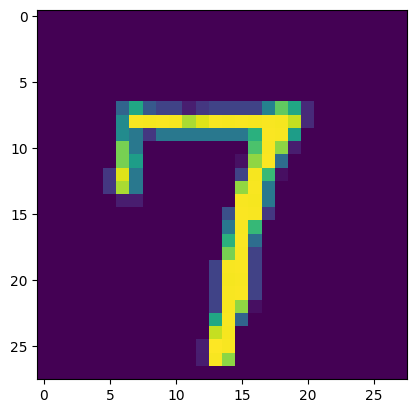

In [6]:
plt.imshow(sample)
plt.show()

## 1-Data

In [7]:
train_tensor=torch.from_numpy(np.array(trainset))

In [8]:
train_tensor

tensor([[1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,
        [7, 0, 0,  ..., 0, 0, 0],
        [6, 0, 0,  ..., 0, 0, 0],
        [9, 0, 0,  ..., 0, 0, 0]])

In [9]:
from torch.utils.data import Dataset

In [10]:
class digits_dataset(Dataset):
    def __init__(self):
        data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
        self.y=torch.from_numpy(np.array(data['label']))
        self.x=torch.from_numpy(np.array(data.drop('label',axis=1))/255)
    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [11]:
data=digits_dataset()

In [12]:
train ,test = torch.utils.data.random_split(data,[0.8,0.2])

In [13]:
x,y=train[0]

In [14]:
train.__len__()

33600

In [15]:
print(x.shape)

torch.Size([784])


## 2-Neural Network and Model

In [16]:
train_loader=DataLoader(dataset=train,batch_size=200,shuffle=True)

In [17]:
model=nn.Sequential(nn.Linear(28*28,512),
                    nn.ReLU(),
                    nn.Linear(512,512),
                    nn.ReLU(),
                    nn.Dropout(p=0.2),
                    nn.Linear(512,256),
                    nn.Linear(256,10)
                    )

## 3-Training 

In [18]:
criterion=nn.CrossEntropyLoss()

In [19]:
import torch.optim as optim

In [20]:
optimizer=optim.Adam(params=model.parameters(),lr=0.001)

### a-Train loop 

In [21]:
for epoch in range(100):
    training_loss = 0
    for data in train_loader:
        #setting gradient at zero
        optimizer.zero_grad()
        #getting data
        features,label=data
        features=features.float()
        #predicting class
        pred=model(features)
        #loss
        loss=criterion(pred,label)
        loss.backward()
        #updating params
        optimizer.step()
        training_loss += loss.item()
    epoch_loss = training_loss / len(train_loader)
    print(f'loss {epoch_loss} for {epoch+1}/100')


loss 0.4172049775010064 for 1/100
loss 0.13753433869264664 for 2/100
loss 0.08620068730254259 for 3/100
loss 0.0609782294625239 for 4/100
loss 0.043062544910104146 for 5/100
loss 0.03479314819698976 for 6/100
loss 0.02585148671641946 for 7/100
loss 0.02104388041646286 for 8/100
loss 0.018875063305521116 for 9/100
loss 0.01589076741324139 for 10/100
loss 0.01657818462228447 for 11/100
loss 0.019490203351042942 for 12/100
loss 0.01351155470530059 for 13/100
loss 0.008100736420688225 for 14/100
loss 0.004744070635275594 for 15/100
loss 0.010698950310511247 for 16/100
loss 0.01683865151547555 for 17/100
loss 0.020053400184440847 for 18/100
loss 0.009964431641145936 for 19/100
loss 0.010138986907978029 for 20/100
loss 0.009608999633201165 for 21/100
loss 0.01130218159782782 for 22/100
loss 0.012371035050169408 for 23/100
loss 0.004763296112233071 for 24/100
loss 0.00738607320817036 for 25/100
loss 0.004849217975350127 for 26/100
loss 0.00543294795659763 for 27/100
loss 0.006053719476421108 

### b-Validation loop

In [22]:
test_loader=DataLoader(dataset=test,batch_size=200,shuffle=False)

In [23]:
validation_loss = 0.0
model.eval() # Put model in evaluation mode
with torch.no_grad(): # Speed up the forward pass
    training_loss = 0
    for data in test_loader:
        #getting data
        features,label=data
        features=features.float()
        #predicting class
        pred=model(features)
        #loss
        loss=criterion(pred,label)
        validation_loss += loss.item()
    validation_loss = validation_loss / len(test_loader)
    print(f'validation loss is {validation_loss}')
model.train()


validation loss is 0.174296551206637


Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): ReLU()
  (4): Dropout(p=0.2, inplace=False)
  (5): Linear(in_features=512, out_features=256, bias=True)
  (6): Linear(in_features=256, out_features=10, bias=True)
)

In [24]:
import torchmetrics
# Create accuracy metric using torch metrics
metric = torchmetrics.Accuracy(task="multiclass", num_classes=10)
for i, data in enumerate(test_loader, 0):
    features, labels = data
    features=features.float()
    outputs = model(features)
    # Calculate accuracy over the batch
    acc = metric(outputs, labels)
# Calculate accuracy over the whole epoch
acc = metric.compute()
print(f"Accuracy on all data: {acc}")
# Reset the metric for the next epoch (training or validation)
metric.reset()

Accuracy on all data: 0.9802380800247192


## 4-Test and Submission

### a-Predicting submission data

In [25]:
submi=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [26]:
X_submi=torch.from_numpy(np.array(submi)/255)
X_submi=X_submi.float()

In [27]:
with torch.no_grad():    
    output=model(X_submi)
    softmax=nn.Softmax(-1)(output)

In [28]:
predicted=torch.argmax(output,1)
predicted

tensor([2, 0, 9,  ..., 3, 9, 2])

In [29]:
label=np.array(predicted)

### b-Submiting data

In [30]:
ImageId=np.array([i for i in range(1,len(label)+1)])

In [31]:
submission=pd.DataFrame({'ImageId':ImageId,'Label':label})

In [32]:
submission.to_csv('/kaggle/working/submission.csv',index=False)

In [33]:
submission_path='/kaggle/working/submission.csv'
pd.read_csv(submission_path)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
